In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

import pickle

In [5]:
pd.pandas.set_option('display.max_rows', 100)
pd.pandas.set_option('display.max_columns', 1000)

In [6]:
rdf = pd.read_csv('Zomato Restaurants DataFrame - Clean & FeatEng II.csv', index_col=False)

In [7]:
rdf.head()

,Restaurant Name,Restaurant Area,Restaurant Rating,Restaurant Review,Latitude,Longitude,Website,Restaurant Address,Price for 2,Additional Info,Province,City,District/Kecamatan,Delivery Service,Place Type,Cuisine Regionality,Cuisines,alkoholtersedia,areamerokok,bawapulangtersedia,brunch,buffet,dessertsandbakes,didalamruangan,hanyabawapulang,hanyabir,hanyauntukreservasimeja,hanyawinedanbir,kehidupanmalam,liveentertainment,livemusic,makandengangrup,makanmewah,menyediakancocktail,parkirgratis,parkirvalettersedia,prasmanan,ramahuntukanak,ramahvegetarian,reservasimejadirekomendasikan,rooftop,ruangpribaditersedia,ruangsholat,sarapan,tempatdudukdiluar,wifitersedia
0,Holy Smokes,Senopati,4.4,1437,-6.239143,106.807954,https://www.zomato.com/id/jakarta/holy-smokes-...,"Jl. Wolter Monginsidi No. 27, Senopati, Jakarta",500000,"['Di dalam ruangan', 'Hanya Wine dan Bir', 'Pa...",DKI Jakarta,Jakarta Selatan,Kebayoran Baru,No,['Casual Dining'],['Barat'],"['Grill House', 'Steak']",0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,Pempek Megaria,Cikini,4.3,461,-6.199900,106.843739,https://www.zomato.com/id/jakarta/pempek-megar...,"Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...",70000,"['Bawa Pulang Tersedia', 'Di dalam ruangan']",DKI Jakarta,Jakarta Pusat,Menteng,No,['Quick Bites'],['Palembang'],['Pempek'],0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Tjikinii Lima,Cikini,4.0,391,-6.189802,106.837150,https://www.zomato.com/id/jakarta/tjikinii-lim...,"Jl. Cikini I No. 5, Cikini, Jakarta 10330",300000,"['Ruang Pribadi Tersedia', 'Tempat duduk di lu...",DKI Jakarta,Jakarta Pusat,Menteng,No,['Casual Dining'],"['Indonesia', 'Barat']",['Kopi'],0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1
3,Gado-Gado Bon-Bin,Cikini,4.0,177,-6.192959,106.838377,https://www.zomato.com/id/jakarta/gado-gado-bo...,"Jl. Cikini 4 No. 5, Cikini, Jakarta",90000,"['Bawa Pulang Tersedia', 'Di dalam ruangan']",DKI Jakarta,Jakarta Pusat,Menteng,No,['Quick Bites'],"['Jawa', 'Indonesia']",['Makanan Sehat'],0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,RM Wong Tegal,Tanjung Duren,3.9,12,-6.182315,106.782992,https://www.zomato.com/id/jakarta/rm-wong-tega...,"Jl. Tanjung Duren Barat 6 No. 5, Tanjung Duren...",100000,"['Bawa Pulang Tersedia', 'Sarapan', 'Di dalam ...",DKI Jakarta,Jakarta Barat,Grogol Petamburan,No,['Quick Bites'],"['Jawa', 'Indonesia']",['Satay'],0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
def convert_list(row, name): 
    stripped = row[name].strip("[]")
    splitted = list(stripped.split(", "))
    final = [letter.strip("'") for letter in splitted]
    return final

# PRICE PREDICTION

# 1. ONE HOT ENCODING

In [9]:
rdf['Price for 2'] = rdf['Price for 2'] / 1000

In [10]:
to_replace = ['Yes','No']
replacement = [1,0]

rdf['Delivery Service'].replace(to_replace,replacement, inplace=True)

In [110]:
rdf.describe()

,Restaurant Rating,Restaurant Review,Latitude,Longitude,Price for 2,Delivery Service,alkoholtersedia,areamerokok,bawapulangtersedia,brunch,buffet,dessertsandbakes,didalamruangan,hanyabawapulang,hanyabir,hanyauntukreservasimeja,hanyawinedanbir,kehidupanmalam,liveentertainment,livemusic,makandengangrup,makanmewah,menyediakancocktail,parkirgratis,parkirvalettersedia,prasmanan,ramahuntukanak,ramahvegetarian,reservasimejadirekomendasikan,rooftop,ruangpribaditersedia,ruangsholat,sarapan,tempatdudukdiluar,wifitersedia
count,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.00000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000,6784.000000
mean,3.535628,87.231574,-6.241331,106.807617,148.701061,0.233343,0.051592,0.315153,0.863060,0.013561,0.020489,0.124558,0.922022,0.023732,0.072229,0.015920,0.022258,0.021816,0.047022,0.02668,0.009876,0.005896,0.024469,0.023290,0.041568,0.013561,0.028449,0.012235,0.266215,0.009581,0.083579,0.111291,0.255749,0.253538,0.378538
std,0.455552,224.340325,0.108503,0.106970,136.656847,0.422990,0.221218,0.464611,0.343809,0.115669,0.141678,0.330241,0.268156,0.152225,0.258885,0.125175,0.147533,0.146093,0.211702,0.16116,0.098894,0.076566,0.154512,0.150834,0.199615,0.115669,0.166265,0.109940,0.442010,0.097422,0.276776,0.314516,0.436313,0.435068,0.485058
min,2.000000,4.000000,-7.247999,106.570949,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,8.750000,-6.269332,106.779415,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.600000,21.000000,-6.225006,106.811950,100.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.800000,63.000000,-6.173597,106.842258,180.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4.900000,5742.000000,-6.090490,112.777749,3500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
nonlistcolumn = ['Restaurant Name', 'Restaurant Area', 'Restaurant Rating', 'Restaurant Review', 'Latitude', 'Longitude', 'Website', 'Restaurant Address', 'Price for 2', 'Province', 'City', 'District/Kecamatan', 'Delivery Service', 'alkoholtersedia', 'areamerokok', 'bawapulangtersedia', 'brunch', 'buffet', 'dessertsandbakes', 'didalamruangan', 'hanyabawapulang', 'hanyabir', 'hanyauntukreservasimeja','hanyawinedanbir', 'kehidupanmalam', 'liveentertainment', 'livemusic', 'makandengangrup', 'makanmewah', 'menyediakancocktail', 'parkirgratis', 'parkirvalettersedia', 'prasmanan', 'ramahuntukanak', 'ramahvegetarian', 'reservasimejadirekomendasikan', 'rooftop', 'ruangpribaditersedia', 'ruangsholat', 'sarapan', 'tempatdudukdiluar', 'wifitersedia']

In [112]:
dataType = []
null = []
nullPct = []
unique = []
uniqueSample = []

for col in nonlistcolumn:
    dataType.append(str(rdf[col].dtype))
    null.append(rdf[col].isnull().sum())
    nullPct.append(round((rdf[col].isnull().sum())/len(rdf[col]),2))
    unique.append(rdf[col].nunique())
    uniqueSample.append(list(rdf[col].unique())[:2])

rdf_info = pd.DataFrame(list(zip(nonlistcolumn, dataType, null, nullPct, unique, uniqueSample)), columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])
rdf_info

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Restaurant Name,object,0,0.0,6657,"[Holy Smokes, Pempek Megaria]"
1,Restaurant Area,object,0,0.0,134,"[Senopati, Cikini]"
2,Restaurant Rating,float64,0,0.0,30,"[4.4, 4.3]"
3,Restaurant Review,int64,0,0.0,637,"[1437, 461]"
4,Latitude,float64,0,0.0,6677,"[-6.2391432684, -6.1999]"
5,Longitude,float64,0,0.0,6672,"[106.807954162, 106.843739]"
6,Website,object,0,0.0,6780,[https://www.zomato.com/id/jakarta/holy-smokes...
7,Restaurant Address,object,0,0.0,5988,"[Jl. Wolter Monginsidi No. 27, Senopati, Jakar..."
8,Price for 2,float64,0,0.0,94,"[500.0, 70.0]"
9,Province,object,0,0.0,3,"[DKI Jakarta, Banten]"


In [15]:
rdf.columns

Index(['Restaurant Name', 'Restaurant Area', 'Restaurant Rating',
       'Restaurant Review', 'Latitude', 'Longitude', 'Website',
       'Restaurant Address', 'Price for 2', 'Additional Info', 'Province',
       'City', 'District/Kecamatan', 'Delivery Service', 'Place Type',
       'Cuisine Regionality', 'Cuisines', 'alkoholtersedia', 'areamerokok',
       'bawapulangtersedia', 'brunch', 'buffet', 'dessertsandbakes',
       'didalamruangan', 'hanyabawapulang', 'hanyabir',
       'hanyauntukreservasimeja', 'hanyawinedanbir', 'kehidupanmalam',
       'liveentertainment', 'livemusic', 'makandengangrup', 'makanmewah',
       'menyediakancocktail', 'parkirgratis', 'parkirvalettersedia',
       'prasmanan', 'ramahuntukanak', 'ramahvegetarian',
       'reservasimejadirekomendasikan', 'rooftop', 'ruangpribaditersedia',
       'ruangsholat', 'sarapan', 'tempatdudukdiluar', 'wifitersedia'],
      dtype='object')

In [113]:
rdfnum = rdf[nonlistcolumn]

In [114]:
rdfnum.head()

,Restaurant Name,Restaurant Area,Restaurant Rating,Restaurant Review,Latitude,Longitude,Website,Restaurant Address,Price for 2,Province,City,District/Kecamatan,Delivery Service,alkoholtersedia,areamerokok,bawapulangtersedia,brunch,buffet,dessertsandbakes,didalamruangan,hanyabawapulang,hanyabir,hanyauntukreservasimeja,hanyawinedanbir,kehidupanmalam,liveentertainment,livemusic,makandengangrup,makanmewah,menyediakancocktail,parkirgratis,parkirvalettersedia,prasmanan,ramahuntukanak,ramahvegetarian,reservasimejadirekomendasikan,rooftop,ruangpribaditersedia,ruangsholat,sarapan,tempatdudukdiluar,wifitersedia
0,Holy Smokes,Senopati,4.4,1437,-6.239143,106.807954,https://www.zomato.com/id/jakarta/holy-smokes-...,"Jl. Wolter Monginsidi No. 27, Senopati, Jakarta",500.0,DKI Jakarta,Jakarta Selatan,Kebayoran Baru,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,Pempek Megaria,Cikini,4.3,461,-6.199900,106.843739,https://www.zomato.com/id/jakarta/pempek-megar...,"Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...",70.0,DKI Jakarta,Jakarta Pusat,Menteng,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Tjikinii Lima,Cikini,4.0,391,-6.189802,106.837150,https://www.zomato.com/id/jakarta/tjikinii-lim...,"Jl. Cikini I No. 5, Cikini, Jakarta 10330",300.0,DKI Jakarta,Jakarta Pusat,Menteng,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1
3,Gado-Gado Bon-Bin,Cikini,4.0,177,-6.192959,106.838377,https://www.zomato.com/id/jakarta/gado-gado-bo...,"Jl. Cikini 4 No. 5, Cikini, Jakarta",90.0,DKI Jakarta,Jakarta Pusat,Menteng,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,RM Wong Tegal,Tanjung Duren,3.9,12,-6.182315,106.782992,https://www.zomato.com/id/jakarta/rm-wong-tega...,"Jl. Tanjung Duren Barat 6 No. 5, Tanjung Duren...",100.0,DKI Jakarta,Jakarta Barat,Grogol Petamburan,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
rdf['Place Type'] = rdf.apply(lambda row: convert_list(row, 'Place Type'), axis=1)
rdf['Cuisines'] = rdf.apply(lambda row: convert_list(row, 'Cuisines'), axis=1)
rdf['Cuisine Regionality'] = rdf.apply(lambda row: convert_list(row, 'Cuisine Regionality'), axis=1)

In [115]:
rdf.head()

,Restaurant Name,Restaurant Area,Restaurant Rating,Restaurant Review,Latitude,Longitude,Website,Restaurant Address,Price for 2,Additional Info,Province,City,District/Kecamatan,Delivery Service,Place Type,Cuisine Regionality,Cuisines,alkoholtersedia,areamerokok,bawapulangtersedia,brunch,buffet,dessertsandbakes,didalamruangan,hanyabawapulang,hanyabir,hanyauntukreservasimeja,hanyawinedanbir,kehidupanmalam,liveentertainment,livemusic,makandengangrup,makanmewah,menyediakancocktail,parkirgratis,parkirvalettersedia,prasmanan,ramahuntukanak,ramahvegetarian,reservasimejadirekomendasikan,rooftop,ruangpribaditersedia,ruangsholat,sarapan,tempatdudukdiluar,wifitersedia
0,Holy Smokes,Senopati,4.4,1437,-6.239143,106.807954,https://www.zomato.com/id/jakarta/holy-smokes-...,"Jl. Wolter Monginsidi No. 27, Senopati, Jakarta",500.0,"['Di dalam ruangan', 'Hanya Wine dan Bir', 'Pa...",DKI Jakarta,Jakarta Selatan,Kebayoran Baru,0,[Casual Dining],[Barat],"[Grill House, Steak]",0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,Pempek Megaria,Cikini,4.3,461,-6.199900,106.843739,https://www.zomato.com/id/jakarta/pempek-megar...,"Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...",70.0,"['Bawa Pulang Tersedia', 'Di dalam ruangan']",DKI Jakarta,Jakarta Pusat,Menteng,0,[Quick Bites],[Palembang],[Pempek],0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Tjikinii Lima,Cikini,4.0,391,-6.189802,106.837150,https://www.zomato.com/id/jakarta/tjikinii-lim...,"Jl. Cikini I No. 5, Cikini, Jakarta 10330",300.0,"['Ruang Pribadi Tersedia', 'Tempat duduk di lu...",DKI Jakarta,Jakarta Pusat,Menteng,0,[Casual Dining],"[Indonesia, Barat]",[Kopi],0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1
3,Gado-Gado Bon-Bin,Cikini,4.0,177,-6.192959,106.838377,https://www.zomato.com/id/jakarta/gado-gado-bo...,"Jl. Cikini 4 No. 5, Cikini, Jakarta",90.0,"['Bawa Pulang Tersedia', 'Di dalam ruangan']",DKI Jakarta,Jakarta Pusat,Menteng,0,[Quick Bites],"[Jawa, Indonesia]",[Makanan Sehat],0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,RM Wong Tegal,Tanjung Duren,3.9,12,-6.182315,106.782992,https://www.zomato.com/id/jakarta/rm-wong-tega...,"Jl. Tanjung Duren Barat 6 No. 5, Tanjung Duren...",100.0,"['Bawa Pulang Tersedia', 'Sarapan', 'Di dalam ...",DKI Jakarta,Jakarta Barat,Grogol Petamburan,0,[Quick Bites],"[Jawa, Indonesia]",[Satay],0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [116]:
unique_region_type = []
unique_cuisine_type = []
unique_rest_type = []

for index, row in rdf.iterrows():
    a = row['Cuisine Regionality'] #has to be a list
    b = row['Cuisines']
    c = row['Place Type']
    unique_region_type.extend(a)
    unique_cuisine_type.extend(b)
    unique_rest_type.extend(c)

unique_region_type = list(set(unique_region_type))
unique_cuisine_type = list(set(unique_cuisine_type))
unique_rest_type = list(set(unique_rest_type))

In [117]:
for rest_type in unique_rest_type:
     rdfnum[rest_type] = rdf['Place Type'].apply(lambda x: rest_type in x)
     rdfnum[rest_type].replace({True:1,False:0},inplace=True)

for csne_type in unique_cuisine_type:
     rdfnum[csne_type] = rdf['Cuisines'].apply(lambda x: csne_type in x)
     rdfnum[csne_type].replace({True:1,False:0},inplace=True)

for rgn_type in unique_region_type:
     rdfnum[rgn_type] = rdf['Cuisine Regionality'].apply(lambda x: rgn_type in x)
     rdfnum[rgn_type].replace({True:1,False:0},inplace=True)


In [118]:
rdfnum

,Restaurant Name,Restaurant Area,Restaurant Rating,Restaurant Review,Latitude,Longitude,Website,Restaurant Address,Price for 2,Province,City,District/Kecamatan,Delivery Service,alkoholtersedia,areamerokok,bawapulangtersedia,brunch,buffet,dessertsandbakes,didalamruangan,hanyabawapulang,hanyabir,hanyauntukreservasimeja,hanyawinedanbir,kehidupanmalam,liveentertainment,livemusic,makandengangrup,makanmewah,menyediakancocktail,parkirgratis,parkirvalettersedia,prasmanan,ramahuntukanak,ramahvegetarian,reservasimejadirekomendasikan,rooftop,ruangpribaditersedia,ruangsholat,sarapan,tempatdudukdiluar,wifitersedia,Fine Dining,Dessert Parlor,Kaki Lima,Food Court,Kafe,Bar,Quick Bites,Casual Dining,Lounge,Toko Kue & Roti,Kios,Toko Minuman,Burger,Makanan Sehat,Barbekyu,Deli,Martabak,Ayam,Pempek,Jus,Tea,Desserts,Hanya Minuman,Kebab,Kue & Roti,Grill House,Seafood,Steak,Sushi,Soto,Bebek,Ice Cream,Gudeg,Makanan Jalanan,Bubur,Dimsum,Minuman,Pizza,Bakmi,Makanan Cepat Saji,Bubble Tea,Bakso,Snacks,Ramen,Meat,Satay,Kopi,Taiwanese,Chinese,Jepang,India Utara,Vietnam,Bangka,Fusion,Amerika,Padang,Libanon,Thai,Kontinental,Perancis,Betawi,Jawa,Jerman,Australian,Mediterania,Malaysia,Kalimantan,Itali,Makassar,Turki,Timur Tengah,Lombok,Medan,Manado,Peranakan,Indonesia,Sumatera,Maroko,Mongolia,Meksiko,Yogyakarta,Eropa,Spanyol,Asia,Amerika Latin,Batak,Sulawesi,Korea,India Selatan,Belanda,Barat,No Region,Singapura,Peruvian,Yunani,Palembang,India,Arab,Sunda,Bali,Aceh
0,Holy Smokes,Senopati,4.4,1437,-6.239143,106.807954,https://www.zomato.com/id/jakarta/holy-smokes-...,"Jl. Wolter Monginsidi No. 27, Senopati, Jakarta",500.0,DKI Jakarta,Jakarta Selatan,Kebayoran Baru,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Pempek Megaria,Cikini,4.3,461,-6.199900,106.843739,https://www.zomato.com/id/jakarta/pempek-megar...,"Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...",70.0,DKI Jakarta,Jakarta Pusat,Menteng,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Tjikinii Lima,Cikini,4.0,391,-6.189802,106.837150,https://www.zomato.com/id/jakarta/tjikinii-lim...,"Jl. Cikini I No. 5, Cikini, Jakarta 10330",300.0,DKI Jakarta,Jakarta Pusat,Menteng,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Gado-Gado Bon-Bin,Cikini,4.0,177,-6.192959,106.838377,https://www.zomato.com/id/jakarta/gado-gado-bo...,"Jl. Cikini 4 No. 5, Cikini, Jakarta",90.0,DKI Jakarta,Jakarta Pusat,Menteng,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,RM Wong Tegal,Tanjung Duren,3.9,12,-6.182315,106.782992,https://www.zomato.com/id/jakarta/rm-wong-tega...,"Jl. Tanjung Duren Barat 6 No. 5, Tanjung Duren...",100.0,DKI Jakarta,Jakarta Barat,Grogol Petamburan,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [119]:
areadf = pd.DataFrame()

areadf['C'] = rdf['City']
areadf['K'] = rdf['District/Kecamatan']

areadf = pd.get_dummies(areadf)

In [120]:
areadf.head()

,C_Bekasi Kabupaten,C_Bekasi Kota,C_Bogor Kabupaten,C_Bogor Kota,C_Cianjur,C_Depok,C_Jakarta Barat,C_Jakarta Pusat,C_Jakarta Selatan,C_Jakarta Timur,C_Jakarta Utara,C_Tangerang,C_Tangerang Kabupaten,C_Tangerang Kota,C_Tangerang Selatan,K_Babakan Madang,K_Bantargebang,K_Batuceper,K_Beji,K_Bekasi Barat,K_Bekasi Selatan,K_Bekasi Timur,K_Bekasi Utara,K_Benda,K_Bogor Barat,K_Bogor Selatan,K_Bogor Tengah,K_Bogor Timur,K_Bogor Utara,K_Bojongsari,K_Cakung,K_Cempaka Putih,K_Cengkareng,K_Ciawi,K_Cibinong,K_Cibodas,K_Cilandak,K_Ciledug,K_Cileungsi,K_Cilincing,K_Cilodong,K_Cimanggis,K_Cinere,K_Cipanas,K_Cipayung,K_Cipondoh,K_Ciputat,K_Ciputat Timur,K_Ciracas,K_Cisarua,K_Cisauk,K_Citeureup,K_Curug,K_Dramaga,K_Duren Sawit,K_Gambir,K_Grogol Petamburan,K_Gunung Putri,K_Jagakarsa,K_Jatiasih,K_Jatinegara,K_Jatisampurna,K_Jatiuwung,K_Johar Baru,K_Kalideres,K_Karang Tengah,K_Karawaci,K_Kebayoran Baru,K_Kebayoran Lama,K_Kebon Jeruk,K_Kelapa Dua,K_Kelapa Gading,K_Kemayoran,K_Kembangan,K_Koja,K_Kramatjati,K_Larangan,K_Limo,K_Makasar,K_Mampang Prapatan,K_Matraman,K_Medan Satria,K_Megamendung,K_Menteng,K_Mustikajaya,K_Neglasari,K_Pacet,K_Pademangan,K_Pagedangan,K_Palmerah,K_Pamulang,K_Pancoran,K_Pancoran Mas,K_Pasar Kemis,K_Pasar Minggu,K_Pasar Rebo,K_Penjaringan,K_Periuk,K_Pesanggrahan,K_Pinang,K_Pondok Aren,K_Pondok Gede,K_Pondok Melati,K_Pulogadung,K_Rawalumbu,K_Sawah Besar,K_Sawangan,K_Senen,K_Serpong,K_Serpong Utara,K_Setiabudi,K_Setu,K_Sukaraja,K_Sukma Jaya,K_Tamansari,K_Tambora,K_Tambun Selatan,K_Tambun Utara,K_Tanah Abang,K_Tanah Sereal,K_Tangerang,K_Tanjung Priok,K_Tapos,K_Tarumajaya,K_Tebet
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
rdfnum = rdfnum.join(areadf)

In [122]:
rdfnum

,Restaurant Name,Restaurant Area,Restaurant Rating,Restaurant Review,Latitude,Longitude,Website,Restaurant Address,Price for 2,Province,City,District/Kecamatan,Delivery Service,alkoholtersedia,areamerokok,bawapulangtersedia,brunch,buffet,dessertsandbakes,didalamruangan,hanyabawapulang,hanyabir,hanyauntukreservasimeja,hanyawinedanbir,kehidupanmalam,liveentertainment,livemusic,makandengangrup,makanmewah,menyediakancocktail,parkirgratis,parkirvalettersedia,prasmanan,ramahuntukanak,ramahvegetarian,reservasimejadirekomendasikan,rooftop,ruangpribaditersedia,ruangsholat,sarapan,tempatdudukdiluar,wifitersedia,Fine Dining,Dessert Parlor,Kaki Lima,Food Court,Kafe,Bar,Quick Bites,Casual Dining,Lounge,Toko Kue & Roti,Kios,Toko Minuman,Burger,Makanan Sehat,Barbekyu,Deli,Martabak,Ayam,Pempek,Jus,Tea,Desserts,Hanya Minuman,Kebab,Kue & Roti,Grill House,Seafood,Steak,Sushi,Soto,Bebek,Ice Cream,Gudeg,Makanan Jalanan,Bubur,Dimsum,Minuman,Pizza,Bakmi,Makanan Cepat Saji,Bubble Tea,Bakso,Snacks,Ramen,Meat,Satay,Kopi,Taiwanese,Chinese,Jepang,India Utara,Vietnam,Bangka,Fusion,Amerika,Padang,Libanon,Thai,Kontinental,Perancis,Betawi,Jawa,Jerman,Australian,Mediterania,Malaysia,Kalimantan,Itali,Makassar,Turki,Timur Tengah,Lombok,Medan,Manado,Peranakan,Indonesia,Sumatera,Maroko,Mongolia,Meksiko,Yogyakarta,Eropa,Spanyol,Asia,Amerika Latin,Batak,Sulawesi,Korea,India Selatan,Belanda,Barat,No Region,Singapura,Peruvian,Yunani,Palembang,India,Arab,Sunda,Bali,Aceh,C_Bekasi Kabupaten,C_Bekasi Kota,C_Bogor Kabupaten,C_Bogor Kota,C_Cianjur,C_Depok,C_Jakarta Barat,C_Jakarta Pusat,C_Jakarta Selatan,C_Jakarta Timur,C_Jakarta Utara,C_Tangerang,C_Tangerang Kabupaten,C_Tangerang Kota,C_Tangerang Selatan,K_Babakan Madang,K_Bantargebang,K_Batuceper,K_Beji,K_Bekasi Barat,K_Bekasi Selatan,K_Bekasi Timur,K_Bekasi Utara,K_Benda,K_Bogor Barat,K_Bogor Selatan,K_Bogor Tengah,K_Bogor Timur,K_Bogor Utara,K_Bojongsari,K_Cakung,K_Cempaka Putih,K_Cengkareng,K_Ciawi,K_Cibinong,K_Cibodas,K_Cilandak,K_Ciledug,K_Cileungsi,K_Cilincing,K_Cilodong,K_Cimanggis,K_Cinere,K_Cipanas,K_Cipayung,K_Cipondoh,K_Ciputat,K_Ciputat Timur,K_Ciracas,K_Cisarua,K_Cisauk,K_Citeureup,K_Curug,K_Dramaga,K_Duren Sawit,K_Gambir,K_Grogol Petamburan,K_Gunung Putri,K_Jagakarsa,K_Jatiasih,K_Jatinegara,K_Jatisampurna,K_Jatiuwung,K_Johar Baru,K_Kalideres,K_Karang Tengah,K_Karawaci,K_Kebayoran Baru,K_Kebayoran Lama,K_Kebon Jeruk,K_Kelapa Dua,K_Kelapa Gading,K_Kemayoran,K_Kembangan,K_Koja,K_Kramatjati,K_Larangan,K_Limo,K_Makasar,K_Mampang Prapatan,K_Matraman,K_Medan Satria,K_Megamendung,K_Menteng,K_Mustikajaya,K_Neglasari,K_Pacet,K_Pademangan,K_Pagedangan,K_Palmerah,K_Pamulang,K_Pancoran,K_Pancoran Mas,K_Pasar Kemis,K_Pasar Minggu,K_Pasar Rebo,K_Penjaringan,K_Periuk,K_Pesanggrahan,K_Pinang,K_Pondok Aren,K_Pondok Gede,K_Pondok Melati,K_Pulogadung,K_Rawalumbu,K_Sawah Besar,K_Sawangan,K_Senen,K_Serpong,K_Serpong Utara,K_Setiabudi,K_Setu,K_Sukaraja,K_Sukma Jaya,K_Tamansari,K_Tambora,K_Tambun Selatan,K_Tambun Utara,K_Tanah Abang,K_Tanah Sereal,K_Tangerang,K_Tanjung Priok,K_Tapos,K_Tarumajaya,K_Tebet
0,Holy Smokes,Senopati,4.4,1437,-6.239143,106.807954,https://www.zomato.com/id/jakarta/holy-smokes-...,"Jl. Wolter Monginsidi No. 27, Senopati, Jakarta",500.0,DKI Jakarta,Jakarta Selatan,Kebayoran Baru,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pempek Megaria,Cikini,4.3,461,-6.199900,106.843739,https://www.zomato.com/id/jakarta/pempek-megar...,"Metropole 21, Jl. Pegangsaan Timur No. 21, Cik...",70.0,DKI Jakarta,Jakarta Pusat,Menteng,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

# 2. BASELINE MODEL

# 2.1 ALL DATASET

In [124]:
# Check Correlation
corr = rdfnum.corr()[['Price for 2']].sort_values('Price for 2', ascending=False)
corr=corr[(corr['Price for 2']>0.2) | (corr['Price for 2']<-0.2) ]
corr.index

Index(['Price for 2', 'reservasimejadirekomendasikan', 'Fine Dining',
       'Casual Dining', 'makanmewah', 'alkoholtersedia', 'wifitersedia',
       'hanyawinedanbir', 'ruangpribaditersedia', 'Restaurant Review',
       'parkirvalettersedia', 'menyediakancocktail', 'Restaurant Rating',
       'hanyabir', 'buffet', 'Barat', 'liveentertainment', 'C_Jakarta Pusat',
       'kehidupanmalam', 'bawapulangtersedia', 'Quick Bites'],
      dtype='object')

In [125]:
corr[1:]

,Price for 2
reservasimejadirekomendasikan,0.521431
Fine Dining,0.493024
Casual Dining,0.481384
makanmewah,0.415261
alkoholtersedia,0.382136
wifitersedia,0.344874
hanyawinedanbir,0.304422
ruangpribaditersedia,0.301383
Restaurant Review,0.295142
parkirvalettersedia,0.285417


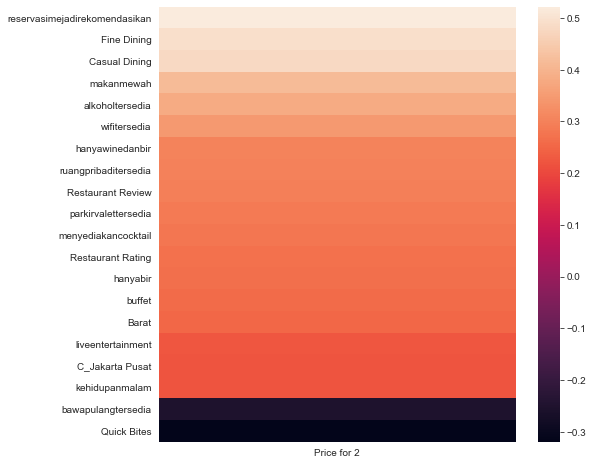

In [126]:
#check correlation with heatmap visualization
plt.figure(figsize=(8,8))
sns.heatmap(corr[1:])
plt.show()

In [127]:
rdfcor = rdfnum[['reservasimejadirekomendasikan', 'Fine Dining','Casual Dining', 'makanmewah', 'alkoholtersedia', 'wifitersedia', 'hanyawinedanbir', 'ruangpribaditersedia', 'Restaurant Review' , 'parkirvalettersedia', 'menyediakancocktail', 'Restaurant Rating', 'hanyabir', 'buffet', 'Barat', 'liveentertainment', 'C_Jakarta Pusat', 'kehidupanmalam', 'bawapulangtersedia', 'Quick Bites']]

In [128]:
rdfcor

,reservasimejadirekomendasikan,Fine Dining,Casual Dining,makanmewah,alkoholtersedia,wifitersedia,hanyawinedanbir,ruangpribaditersedia,Restaurant Review,parkirvalettersedia,menyediakancocktail,Restaurant Rating,hanyabir,buffet,Barat,liveentertainment,C_Jakarta Pusat,kehidupanmalam,bawapulangtersedia,Quick Bites
0,1,0,1,0,0,1,1,0,1437,1,0,4.4,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,461,0,0,4.3,0,0,0,0,1,0,1,1
2,1,0,1,0,0,1,0,1,391,0,0,4.0,0,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,177,0,0,4.0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,12,0,0,3.9,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,0,0,0,0,0,0,0,0,13,0,0,2.3,0,0,0,0,0,0,1,1
6780,0,0,0,0,0,0,0,0,33,0,0,3.3,0,0,0,0,0,0,1,1
6781,0,0,0,0,0,0,0,0,18,0,0,3.1,0,0,0,0,0,0,1,1
6782,0,0,0,0,0,0,0,0,30,0,0,2.1,0,0,0,0,0,0,1,1


In [129]:
#standard scaling with MinMaxScaler
scaler = RobustScaler()
scaler.fit(rdfcor)
rdfcor = pd.DataFrame(scaler.transform(rdfcor),columns=rdfcor.columns)
rdfcor

,reservasimejadirekomendasikan,Fine Dining,Casual Dining,makanmewah,alkoholtersedia,wifitersedia,hanyawinedanbir,ruangpribaditersedia,Restaurant Review,parkirvalettersedia,menyediakancocktail,Restaurant Rating,hanyabir,buffet,Barat,liveentertainment,C_Jakarta Pusat,kehidupanmalam,bawapulangtersedia,Quick Bites
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,26.101382,1.0,0.0,1.333333,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.110599,0.0,0.0,1.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.820276,0.0,0.0,0.666667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.875576,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.165899,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.147465,0.0,0.0,-2.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221198,0.0,0.0,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.055300,0.0,0.0,-0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165899,0.0,0.0,-2.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
#set target and features
y = rdfnum['Price for 2']
X = rdfcor

In [131]:
#Train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [132]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [133]:
co_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
co_df

,Coefficient
reservasimejadirekomendasikan,8.190364
Fine Dining,606.075521
Casual Dining,86.261666
makanmewah,106.502309
alkoholtersedia,100.783923
wifitersedia,19.832057
hanyawinedanbir,131.744962
ruangpribaditersedia,19.395341
Restaurant Review,0.959844
parkirvalettersedia,20.249806


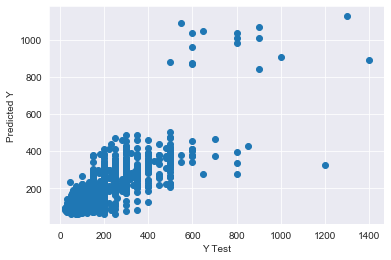

In [134]:
predictions = lr.predict(X_test) #predict test
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [135]:
score = r2_score(y_test,predictions)
score

0.6678516583113161

# 2.2 DKI JAKARTA DATASET

In [136]:
jkt_idx = rdf[rdf['Province'] == 'DKI Jakarta'].index

In [137]:
rdfnumjkt = rdfnum.loc[jkt_idx]

In [138]:
# Check Correlation
corrjkt = rdfnumjkt.corr()[['Price for 2']].sort_values('Price for 2', ascending=False)
corrjkt=corrjkt[(corrjkt['Price for 2']>0.2) | (corrjkt['Price for 2']<-0.2) ]
corrjkt.index

Index(['Price for 2', 'reservasimejadirekomendasikan', 'Fine Dining',
       'Casual Dining', 'makanmewah', 'alkoholtersedia', 'wifitersedia',
       'ruangpribaditersedia', 'hanyawinedanbir', 'Restaurant Rating',
       'Restaurant Review', 'parkirvalettersedia', 'menyediakancocktail',
       'buffet', 'Barat', 'hanyabir', 'liveentertainment', 'kehidupanmalam',
       'bawapulangtersedia', 'Quick Bites'],
      dtype='object')

In [139]:
corrjkt[1:]

,Price for 2
reservasimejadirekomendasikan,0.522000
Fine Dining,0.514988
Casual Dining,0.462016
makanmewah,0.434192
alkoholtersedia,0.384025
wifitersedia,0.357878
ruangpribaditersedia,0.319582
hanyawinedanbir,0.309834
Restaurant Rating,0.288880
Restaurant Review,0.286610


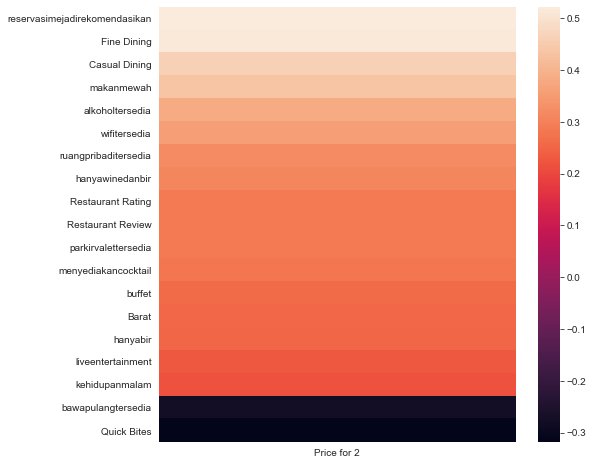

In [140]:
#check correlation with heatmap visualization
plt.figure(figsize=(8,8))
sns.heatmap(corrjkt[1:])
plt.show()

In [141]:
rdfcorjkt= rdfnumjkt[['reservasimejadirekomendasikan', 'Fine Dining', 'Casual Dining', 'makanmewah', 'alkoholtersedia', 'wifitersedia', 'ruangpribaditersedia', 'hanyawinedanbir', 'Restaurant Rating', 'Restaurant Review', 'parkirvalettersedia', 'menyediakancocktail', 'buffet', 'Barat', 'hanyabir', 'liveentertainment', 'kehidupanmalam', 'bawapulangtersedia', 'Quick Bites']]

In [142]:
#standard scaling with MinMaxScaler
scaler = RobustScaler()
scaler.fit(rdfcorjkt)
rdfcorjkt = pd.DataFrame(scaler.transform(rdfcorjkt),columns=rdfcorjkt.columns)
rdfcorjkt

,reservasimejadirekomendasikan,Fine Dining,Casual Dining,makanmewah,alkoholtersedia,wifitersedia,ruangpribaditersedia,hanyawinedanbir,Restaurant Rating,Restaurant Review,parkirvalettersedia,menyediakancocktail,buffet,Barat,hanyabir,liveentertainment,kehidupanmalam,bawapulangtersedia,Quick Bites
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.333333,20.157143,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.166667,6.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.666667,5.214286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,2.157143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.614286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.166667,-0.185714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500000,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.833333,-0.114286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [177]:
#set target and features
y = rdfnumjkt['Price for 2']
X = rdfcorjkt

In [178]:
#Train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [179]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [180]:
cojkt_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
cojkt_df

,Coefficient
reservasimejadirekomendasikan,15.831805
Fine Dining,551.126963
Casual Dining,87.218521
makanmewah,135.153233
alkoholtersedia,126.819518
wifitersedia,20.961151
ruangpribaditersedia,13.687484
hanyawinedanbir,144.826223
Restaurant Rating,11.393842
Restaurant Review,0.577420


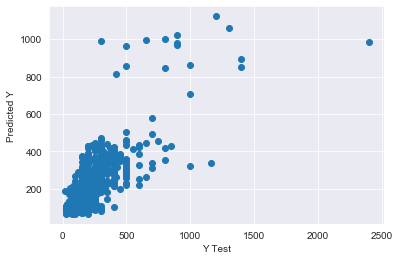

In [181]:
predictions = lr.predict(X_test) #predict test
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [182]:
score = r2_score(y_test,predictions)
score

0.6589935429154359

In [149]:
filename = 'scaler_zomato_fulldata.sav'
pickle.dump(scaler, open(filename , 'wb'))

# 3. USE K-FOLD TO DECIDE WHICH MODEL WE WILL OPTIMIZE FURTHER

In [150]:
def regression_model(n_cv):
    score = []
    model_name = ['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor', 'AdaBoostRegressor', 'KNeighborRegressor', 'SVR', 'XGBRegressor']
    models = [LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,KNeighborsRegressor,SVR,XGBRegressor]
    
    for item in models:
        rmse = []
        mae = []
        r2score=[]
        adjr2scrlst=[]

        kf = KFold(n_splits=n_cv,shuffle=True)

        for train_index, test_index in kf.split(X,y):
            X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            model = item()
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            mae.append(round(mean_absolute_error(y_test,prediction),2))
            rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))
            r2score.append(round(r2_score(y_test,prediction),2))
            adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt.shape[1]-1)
            adjr2scrlst.append(round(adjr2score,2))

            
        scorelist = [sum(mae)/n_cv, sum(rmse)/n_cv, sum(r2score)/n_cv, sum(adjr2scrlst)/n_cv]
        score.append(scorelist)
        
    return pd.DataFrame(score,columns=['MAE','RMSE','R2_Score', 'Adj. R2_Score'],index=model_name)

In [151]:
regression_model(10)

,MAE,RMSE,R2_Score,Adj. R2_Score
Linear Regression,50.651,94.077,0.622,0.620
Lasso,50.924,93.450,0.624,0.623
Ridge,50.540,92.806,0.623,0.623
DecisionTreeRegressor,65.974,127.134,0.262,0.259
RandomForestRegressor,53.534,99.437,0.560,0.558
GradientBoostingRegressor,50.132,96.894,0.594,0.591
AdaBoostRegressor,123.155,153.726,-0.129,-0.132
KNeighborRegressor,55.408,106.474,0.511,0.509
SVR,60.362,128.921,0.288,0.285
XGBRegressor,53.382,107.282,0.474,0.473


In [152]:
rmse_list = []
mae_list = []
r2score_list = []
adjr2scorelist = []

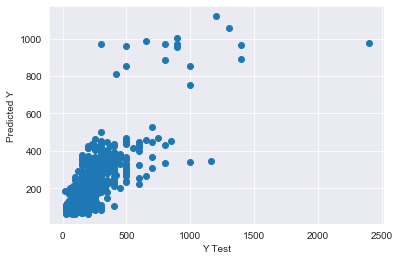

In [153]:
model = LinearRegression()
model.fit(X,y)
prediction = model.predict(X_test)
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [154]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 50.02581326425231
MSE: 8017.968805686785
RMSE: 89.54311143626173
R2 Score: 0.6662567557694561


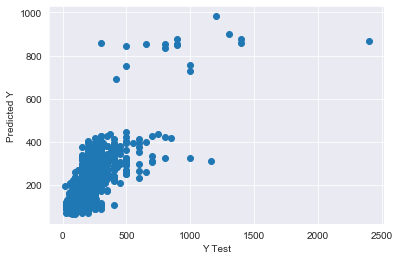

In [155]:
model = Lasso()
model.fit(X,y)
prediction = model.predict(X_test)
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [156]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 50.77794709013819
MSE: 8316.439219487183
RMSE: 91.19451309967712
R2 Score: 0.653833100025382


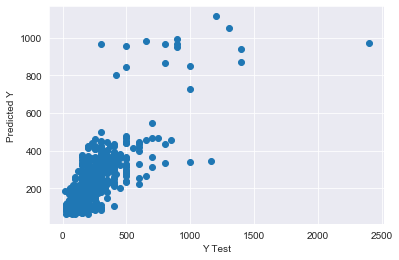

In [157]:
model = Ridge(random_state=123)
model.fit(X,y)
prediction = model.predict(X_test)
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [158]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 50.010937884827555
MSE: 8036.9793899631
RMSE: 89.64920183673193
R2 Score: 0.6654654513599658


In [159]:
rf = RandomForestRegressor(random_state=123)

parameters = {
    'n_estimators': [10, 25, 50, 100,150, 200, 250],
    'min_samples_split' : [i for i in range(2,5)],
    'min_samples_leaf' : [i for i in range(2,5)],
    'max_depth': [5,10, 15, 20, 50, 70]
}
search = GridSearchCV(estimator=rf,param_grid=parameters, cv=3,scoring='r2',n_jobs=-1)
search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 50, 70],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 25, 50, 100, 150, 200, 250]},
             scoring='r2')

In [160]:
search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 250}

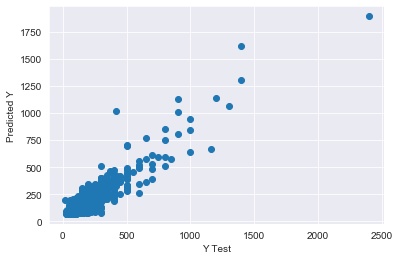

In [161]:
model=RandomForestRegressor(random_state=123,max_depth=10,min_samples_leaf=2,min_samples_split=2,n_estimators=250)
model.fit(X,y)
prediction = model.predict(X_test)

plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [162]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 40.59411886529139
MSE: 3922.9184979257866
RMSE: 62.63320603262926
R2 Score: 0.8367108206480957


In [163]:
gradient = GradientBoostingRegressor(random_state=123)

parameters = {
    'n_estimators' : [20,25,50,75,100],
    'learning_rate' : np.linspace(0.001,0.5,2),
    'subsample' : np.linspace(0.1,0.8,2),
    'min_samples_split' : [i for i in range(2,5)],
    'min_samples_leaf' : [i for i in range(2,5)],
    'max_depth' : [i for i in range(4,7)]
}
search = GridSearchCV(estimator=gradient,param_grid=parameters, cv=3,scoring='r2',n_jobs=-1)
search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.001, 0.5  ]),
                         'max_depth': [4, 5, 6], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [20, 25, 50, 75, 100],
                         'subsample': array([0.1, 0.8])},
             scoring='r2')

In [164]:
search.best_params_

{'learning_rate': 0.5,
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 20,
 'subsample': 0.8}

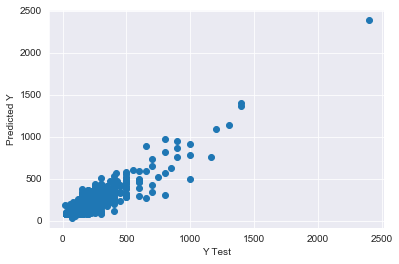

In [165]:
model=GradientBoostingRegressor(random_state=123,learning_rate=0.5,max_depth=4,min_samples_leaf=3,min_samples_split=2,n_estimators=20,subsample=0.8)
model.fit(X,y)
prediction = model.predict(X_test)

plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [166]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 42.46919501218965
MSE: 4135.5727188318115
RMSE: 64.30841872439262
R2 Score: 0.8278592135510265


In [167]:
model_2nd_name = ['Linear Regression', 'Lasso', 'Ridge', 'RandomForestRegressor', 'GradientBoostingRegressor']

In [168]:
pd.DataFrame({'MAE' : mae_list, 'RMSE' : rmse_list, 'R2_score' : r2score_list, 'Adj. R2_Score' : adjr2scorelist}, index=model_2nd_name)

,MAE,RMSE,R2_score,Adj. R2_Score
Linear Regression,50.03,89.54,0.67,0.66
Lasso,50.78,91.19,0.65,0.65
Ridge,50.01,89.65,0.67,0.66
RandomForestRegressor,40.59,62.63,0.84,0.84
GradientBoostingRegressor,42.47,64.31,0.83,0.83


# RANDOM FOREST REGRESSOR is THE BEST MODEL

In [183]:
model=RandomForestRegressor(random_state=123,max_depth=10,min_samples_leaf=2,min_samples_split=2,n_estimators=250)
model.fit(X,y)
prediction = model.predict(X_test)

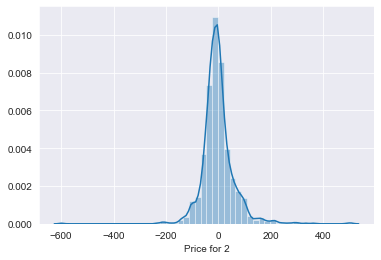

In [184]:
#Residual values
sns.distplot((y_test-prediction),bins=50)
plt.show()

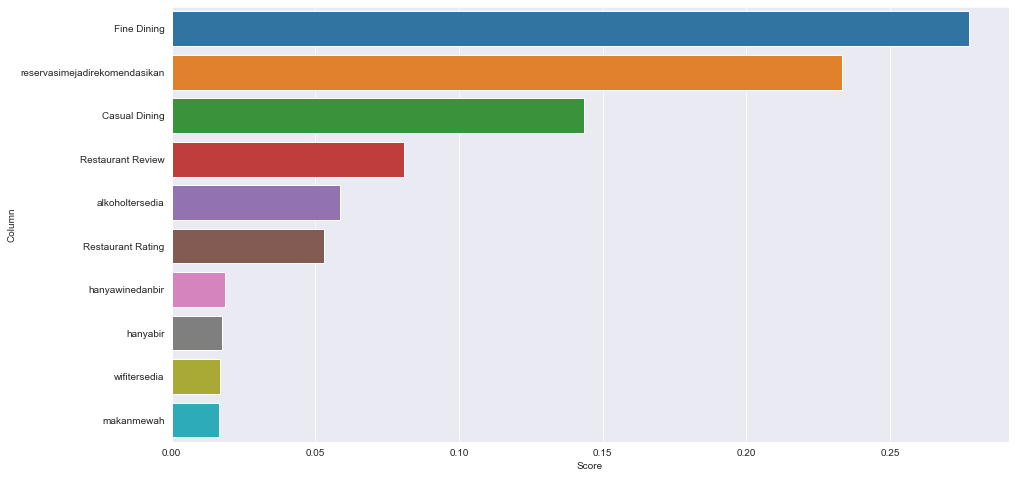

In [186]:
score = pd.DataFrame(model.feature_importances_, columns=['Score'])
score['Column'] = X.columns
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(data=score.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

In [185]:
model

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=250,
                      random_state=123)

In [187]:
filename = 'price_pred_zomato_fulldata.sav'
pickle.dump(model, open(filename, 'wb'))


# 4. REMOVE OUTLIERS

In [170]:
rdfjkt = rdf[rdf['Province'] == 'DKI Jakarta']
rdfjkt.shape

(4823, 46)

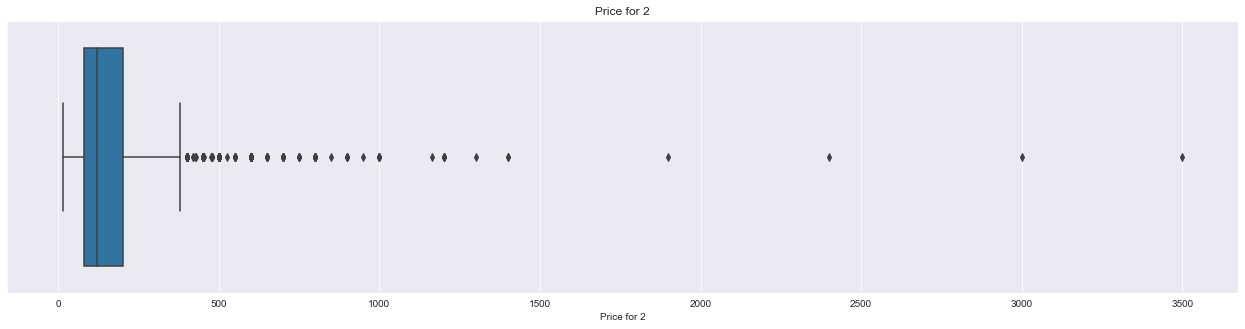

In [171]:
# Check outlier Data with Boxplot

fig=plt.figure(figsize=(75,5))
ax = fig.add_subplot(1,3,1)
ax.set_title('Price for 2')
sns.boxplot(rdfjkt['Price for 2'])


In [172]:
def check_outlier(row, col):
    q1 = row[col].quantile(0.25)
    q3 = row[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return row[(row[col] < lower_limit) | (row[col] > upper_limit)].index , upper_limit, lower_limit

In [173]:
idxdrop, upper_limit, lower_limit= check_outlier(rdfjkt,'Price for 2')
rdfjkt.drop(idxdrop,inplace=True)

In [174]:
rdfnumjkt2 = rdfnum.loc[rdfjkt.index]

In [175]:
# Check Correlation
corrjkt2 = rdfnumjkt2 .corr()[['Price for 2']].sort_values('Price for 2', ascending=False)
corrjkt2 = corrjkt2[(corrjkt2['Price for 2']>0.2) | (corrjkt2['Price for 2']<-0.2) ]
corrjkt2.index

Index(['Price for 2', 'Casual Dining', 'reservasimejadirekomendasikan',
       'wifitersedia', 'alkoholtersedia', 'hanyabir', 'Barat',
       'Restaurant Review', 'ruangpribaditersedia', 'areamerokok',
       'Restaurant Rating', 'Bar', 'kehidupanmalam', 'hanyawinedanbir',
       'parkirvalettersedia', 'menyediakancocktail', 'liveentertainment',
       'Toko Minuman', 'Indonesia', 'Quick Bites'],
      dtype='object')

In [176]:
corrjkt2[1:]

,Price for 2
Casual Dining,0.690089
reservasimejadirekomendasikan,0.640448
wifitersedia,0.437488
alkoholtersedia,0.343607
hanyabir,0.332212
Barat,0.328269
Restaurant Review,0.270079
ruangpribaditersedia,0.259255
areamerokok,0.239673
Restaurant Rating,0.235213


In [32]:
rdfcorjkt2= rdfnumjkt2[['Casual Dining', 'reservasimejadirekomendasikan', 'wifitersedia', 'alkoholtersedia', 'hanyabir', 'Barat', 'Restaurant Review', 'ruangpribaditersedia', 'areamerokok', 'Restaurant Rating', 'Bar', 'kehidupanmalam', 'hanyawinedanbir', 'parkirvalettersedia', 'menyediakancocktail', 'liveentertainment', 'Toko Minuman', 'Indonesia', 'Quick Bites']]

In [33]:
# Standard scaling with Robust Scaler   
scaler2 = RobustScaler()
scaler2.fit(rdfcorjkt2)
rdfcorjkt2 = pd.DataFrame(scaler2.transform(rdfcorjkt2),columns=rdfcorjkt2.columns)
rdfcorjkt2

,Casual Dining,reservasimejadirekomendasikan,wifitersedia,alkoholtersedia,hanyabir,Barat,Restaurant Review,ruangpribaditersedia,areamerokok,Restaurant Rating,Bar,kehidupanmalam,hanyawinedanbir,parkirvalettersedia,menyediakancocktail,liveentertainment,Toko Minuman,Indonesia,Quick Bites
0,0.0,0.0,0.0,0.0,0.0,0.0,7.551724,0.0,0.0,1.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,1.0,1.0,1.0,0.0,0.0,1.0,6.344828,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.655172,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.189655,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.051724,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4474,0.0,0.0,0.0,0.0,0.0,0.0,-0.172414,0.0,0.0,-2.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4475,0.0,0.0,0.0,0.0,0.0,0.0,0.172414,0.0,0.0,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
4476,0.0,0.0,0.0,0.0,0.0,0.0,-0.086207,0.0,0.0,-0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0


In [109]:
filename = 'scaler_zomato_nooutlierprice.sav'
pickle.dump(scaler2, open(filename , 'wb'))

In [34]:
#set target and features
y = rdfnumjkt2['Price for 2']
X = rdfcorjkt2

In [35]:
#Train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
cojkt2_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
cojkt2_df

,Coefficient
Casual Dining,69.991225
reservasimejadirekomendasikan,22.370239
wifitersedia,18.801502
alkoholtersedia,62.683891
hanyabir,35.534258
Barat,20.490615
Restaurant Review,0.735259
ruangpribaditersedia,7.890902
areamerokok,-2.304958
Restaurant Rating,5.414374


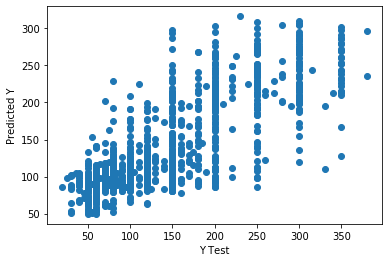

In [38]:
predictions = lr.predict(X_test) #predict test
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [39]:
score = r2_score(y_test,predictions)
score

0.6224039408613501

In [42]:
def regression_model(n_cv):
    score = []
    model_name = ['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor', 'AdaBoostRegressor', 'KNeighborRegressor', 'SVR', 'XGBRegressor']
    models = [LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,KNeighborsRegressor,SVR,XGBRegressor]
    
    for item in models:
        rmse = []
        mae = []
        r2score=[]
        adjr2scrlst=[]

        kf = KFold(n_splits=n_cv,shuffle=True)

        for train_index, test_index in kf.split(X,y):
            X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            model = item()
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            mae.append(round(mean_absolute_error(y_test,prediction),2))
            rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))
            r2score.append(round(r2_score(y_test,prediction),2))
            adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt2.shape[1]-1)
            adjr2scrlst.append(round(adjr2score,2))

            
        scorelist = [sum(mae)/n_cv, sum(rmse)/n_cv, sum(r2score)/n_cv, sum(adjr2scrlst)/n_cv]
        score.append(scorelist)
        
    return pd.DataFrame(score,columns=['MAE','RMSE','R2_Score', 'Adj. R2_Score'],index=model_name)

In [43]:
regression_model(10)

,MAE,RMSE,R2_Score,Adj. R2_Score
Linear Regression,34.862,46.705,0.619,0.617
Lasso,36.085,48.077,0.595,0.591
Ridge,34.878,46.737,0.617,0.614
DecisionTreeRegressor,46.978,65.058,0.258,0.255
RandomForestRegressor,37.545,50.384,0.553,0.553
GradientBoostingRegressor,34.467,46.459,0.620,0.620
AdaBoostRegressor,42.966,52.905,0.509,0.506
KNeighborRegressor,38.075,51.643,0.534,0.530
SVR,39.340,54.435,0.480,0.479
XGBRegressor,36.468,49.672,0.565,0.565


In [93]:
rmse_list = []
mae_list = []
r2score_list = []
adjr2scorelist = []

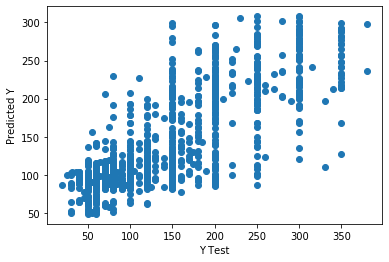

In [94]:
model = LinearRegression()
model.fit(X,y)
prediction = model.predict(X_test)
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [95]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt2.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 35.13317941050481
MSE: 2188.3673976153304
RMSE: 46.7799892861823
R2 Score: 0.6249951331081234


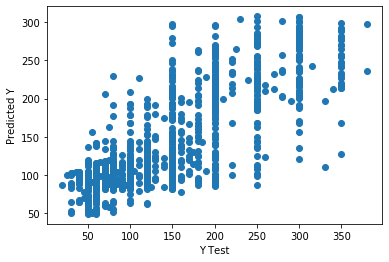

In [96]:
model = Ridge(random_state=123)
model.fit(X,y)
prediction = model.predict(X_test)
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [97]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt2.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 35.1372571381333
MSE: 2188.3470668895575
RMSE: 46.77977198415526
R2 Score: 0.6249986170391675


In [89]:
gradient = GradientBoostingRegressor(random_state=123)

parameters = {
    'n_estimators' : [20,25,50,75,100],
    'learning_rate' : np.linspace(0.001,0.5,2),
    'subsample' : np.linspace(0.1,0.8,2),
    'min_samples_split' : [i for i in range(2,5)],
    'min_samples_leaf' : [i for i in range(2,5)],
    'max_depth' : [i for i in range(4,7)]
}
search = GridSearchCV(estimator=gradient,param_grid=parameters, cv=3,scoring='r2',n_jobs=-1)
search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.001, 0.5  ]),
                         'max_depth': [4, 5, 6], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [20, 25, 50, 75, 100],
                         'subsample': array([0.1, 0.8])},
             scoring='r2')

In [90]:
search.best_params_

{'learning_rate': 0.5,
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 20,
 'subsample': 0.8}

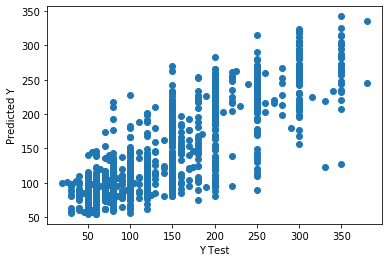

In [98]:
model=GradientBoostingRegressor(random_state=123,learning_rate=0.5,max_depth=4,min_samples_leaf=3,min_samples_split=2,n_estimators=20,subsample=0.8)
model.fit(X,y)
prediction = model.predict(X_test)

plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [99]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt2.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 31.831247200450072
MSE: 1769.390565366523
RMSE: 42.06412444550015
R2 Score: 0.6967921957857416


In [85]:
xgb = XGBRegressor(random_state=123)

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [i for i in range(4,7)],
              'subsample': np.linspace(0.1,0.8,8),
              'n_estimators': [50,75,100,250,500]}


search = GridSearchCV(estimator=xgb,param_grid=parameters, cv=3,scoring='r2',n_jobs=-1)
search.fit(X_train,y_train)

[11:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=123,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [86]:
search.best_params_

{'learning_rate': 0.07,
 'max_depth': 4,
 'n_estimators': 75,
 'nthread': 4,
 'objective': 'reg:linear',
 'subsample': 0.7000000000000001}

[11:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


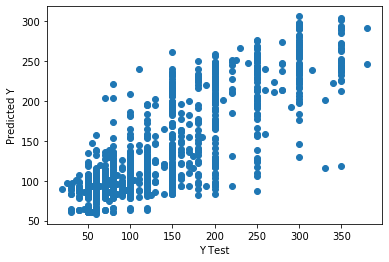

In [100]:
model=XGBRegressor(random_state=123,learning_rate=0.07,max_depth=4,n_estimators=75, nthread=4, objective= 'reg:linear', subsample=0.7)
model.fit(X,y)
prediction = model.predict(X_test)

plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [101]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2 Score:', r2_score(y_test,prediction))

rmse = np.sqrt(mean_squared_error(y_test, prediction))
mae = mean_absolute_error(y_test, prediction)
r2score = r2_score(y_test,prediction)
adjr2score = 1 - (1 - r2_score(y_test,prediction))*(len(y)-1)/(len(y)-rdfcorjkt2.shape[1]-1)

rmse_list.append(round(rmse,2))
mae_list.append(round(mae,2))
r2score_list.append(round(r2score,2))
adjr2scorelist.append(round(adjr2score,2))

MAE: 32.709364243916106
MSE: 1879.8288076550612
RMSE: 43.356992603904864
R2 Score: 0.677867184202076


In [102]:
model_2nd_name = ['Linear Regression', 'Ridge', 'GradientBoostingRegressor', 'XGBoostRegressor']

In [103]:
pd.DataFrame({'MAE' : mae_list, 'RMSE' : rmse_list, 'R2_score' : r2score_list, 'Adj. R2_Score' : adjr2scorelist}, index=model_2nd_name)

,MAE,RMSE,R2_score,Adj. R2_Score
Linear Regression,35.13,46.78,0.62,0.62
Ridge,35.14,46.78,0.62,0.62
GradientBoostingRegressor,31.83,42.06,0.70,0.70
XGBoostRegressor,32.71,43.36,0.68,0.68


# GRADIENT BOOSTING REGRESSOR is THE BEST MODEL

In [104]:
model=GradientBoostingRegressor(random_state=123,learning_rate=0.5,max_depth=4,min_samples_leaf=3,min_samples_split=2,n_estimators=20,subsample=0.8)
model.fit(X,y)
prediction = model.predict(X_test)

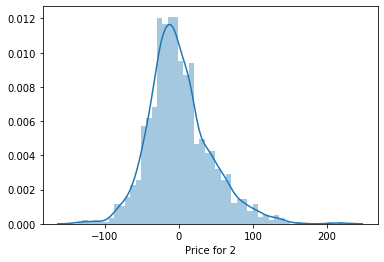

In [105]:
#Residual values
sns.distplot((y_test-prediction),bins=50)
plt.show()

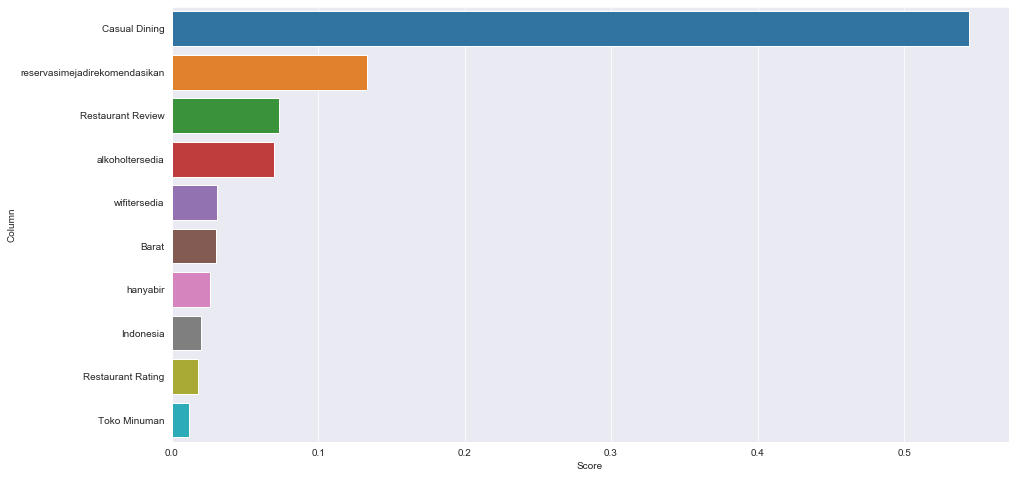

In [106]:
score = pd.DataFrame(model.feature_importances_, columns=['Score'])
score['Column'] = X.columns
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(data=score.sort_values(by=['Score'],ascending=False).head(10),x='Score',y='Column')
plt.show()

In [107]:
model

GradientBoostingRegressor(learning_rate=0.5, max_depth=4, min_samples_leaf=3,
                          n_estimators=20, random_state=123, subsample=0.8)

In [108]:
filename = 'price_pred_zomato_nooutlierprice.sav'
pickle.dump(model, open(filename, 'wb'))